In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
def fix_indexes(ar):
    ind = np.zeros((len(ar), 3),  dtype=np.int16 )
    for i in range(len(ar)):
        ind[i,0] = int(ar[i][0][0:5])
        ind[i,1] = int(ar[i][0][6:11])
        ind[i,2] = int(ar[i][0][12:])
    return ind

In [3]:
train_indexes = pd.read_csv('train.csv',header=None).to_numpy()
test_indexes = pd.read_csv('test.csv',header=None).to_numpy()

train_indexes = fix_indexes(train_indexes)
test_indexes = fix_indexes(test_indexes)

In [4]:
for i in range(30000):
    temp = train_indexes[i,2]
    train_indexes[i,2] = train_indexes[i,1]
    train_indexes[i,1] = temp

In [5]:
y = np.zeros(len(train_indexes))
y[30000:] = 1

In [6]:
Xtotal = pd.read_csv("feat1.csv", header = None).to_numpy()[1:,1:]

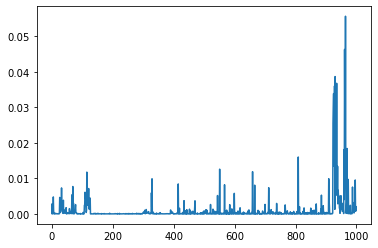

In [7]:
plt.plot(np.mean(Xtotal, axis = 0))

In [8]:
np.where(np.mean(Xtotal, axis = 0)>.01)[0].shape

(20,)

In [9]:
ind = np.where(np.mean(Xtotal, axis = 0)>.01)[0]
ncols = len(ind)

In [10]:
X = np.zeros((len(train_indexes), ncols*3))
for i in range(len(train_indexes)):
    X[i, 0:ncols] = Xtotal[train_indexes[i, 0], ind]
    X[i, ncols:2*ncols] = Xtotal[train_indexes[i, 1], ind]
    X[i, 2*ncols:3*ncols] = Xtotal[train_indexes[i, 2], ind] 

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 100).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8050878784823738
0.6727602661469185


In [14]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 300).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9120207010115267
0.7150346125411654


In [15]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 500).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9515744194643277
0.7308958935412326


In [ ]:
clf = HistGradientBoostingClassifier( l2_regularization = 2*1e-4, max_iter = 1000).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

In [16]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [24]:
model = tf.keras.Sequential()
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [25]:
model.predict(X_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               30500     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1002      
Total params: 31,502
Trainable params: 31,502
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, batch_size=50, epochs = 200, verbose = 2, validation_data=(X_test, y_test))

Epoch 1/200
596/596 - 2s - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4968
Epoch 2/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.4984
Epoch 3/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.4965
Epoch 4/200
596/596 - 2s - loss: 0.6931 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.4965
Epoch 5/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.4960
Epoch 6/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.4965
Epoch 7/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 8/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4948
Epoch 9/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.4952
Epoch 10/200
596/596 - 1s - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accura

KeyboardInterrupt: 